# What's the impact of special cards on the duration of the game?

The card deck of UNO includes some special cards. Special cards named special because they trigger an effect that is an unfair advantage or disadvantage. The special cards are _wildcard_ (chose new color), _skip_ (next player is skipped), _plus2_ (next player has to draw 2 cards or add a _plus2_ as well), _wildcard plus4_ (combination of wildcard and next player has to draw 4 cards). I analyzed multiple arrangements of special cards. The scattered plot below shows a sorted scatter plot of the number of rounds. The plot reveals that adding the _plus2_ extends the game, while adding the _wildcard_ shortens the game. Adding all special cards rather extends the duration. With the aim of 15 to 30 rounds per game, the configuration with all special cards or only _plus2_-cards works the best as shown in the histogram.


In [1]:

import sys
sys.path.insert(0, "/home/paszin/Documents/board-game-simulation/src/GameSimulation/")


from Games.Base import Card

from Games.Uno import Game, Player
import numpy as np

import time

import random
random.seed(1419265)

import matplotlib.pyplot as plt


In [2]:
def generate_cards(colors=True, plus2=True, skip=True, wildcard=True, wildcardplus4=True):
    color_options = ["red", "blue", "yellow", "green"]
    cards = []
    if colors:
        for color in color_options:
            cards.append(Card(number=0, symbol=color))
            for i in range(1, 10):
                cards.append(Card(number=i, symbol=color))
    if plus2:
        for color in color_options:
            for i in range(2):
                cards.append(Card(number="+2", symbol=color))
    if skip:
        for color in color_options:
            for i in range(2):
                cards.append(Card(number="+2", symbol=color))
    if wildcard:
        for i in range(4):
            cards.append(Card(symbol="rainbow", number="0"))
    if wildcardplus4:
        for i in range(4):
            cards.append(Card(symbol="rainbow", number="+4"))
    return cards

In [3]:
start_time = time.time()

number_of_players = 3
cards_per_player = 7
number_of_iterations = 1000
turns_per_scenario = {}

print("basic")
turns_per_scenario["basic"] = []
random.seed(1892)
for _ in range(number_of_iterations):
    game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
    cards = generate_cards(colors=True, plus2=False, skip=False, wildcard=False, wildcardplus4=False)
    game.setup(cards)
    game.simulate(quiet=True, turns=150)
    turns_per_scenario["basic"].append(game.turn/number_of_players)


print("basic and plus 2")
turns_per_scenario["basic and plus2"] = []
random.seed(1892)
for _ in range(number_of_iterations):
    game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
    cards = generate_cards(colors=True, plus2=True, skip=False, wildcard=False, wildcardplus4=False)
    game.setup(cards)
    game.simulate(quiet=True, turns=150)
    turns_per_scenario["basic and plus2"].append(game.turn/number_of_players)

    
print("basic and wildcard")    
turns_per_scenario["basic and wildcard"] = []
random.seed(1892)
for _ in range(number_of_iterations):
    game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
    cards = generate_cards(colors=True, plus2=False, skip=False, wildcard=True, wildcardplus4=False)
    game.setup(cards)
    game.simulate(quiet=True, turns=150)
    turns_per_scenario["basic and wildcard"].append(game.turn/number_of_players)
    

print("basic and plus2 and wildcard")
turns_per_scenario["basic and plus2 and wildcard"] = []
random.seed(1892)
for _ in range(number_of_iterations):
    game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
    cards = generate_cards(colors=True, plus2=True, skip=False, wildcard=True, wildcardplus4=False)
    game.setup(cards)
    game.simulate(quiet=True, turns=150)
    turns_per_scenario["basic and plus2 and wildcard"].append(game.turn/number_of_players)

    
print("basic and plus2 and wildcard and wildcardplus4 and skip")
turns_per_scenario["basic and plus2 and wildcard and wildcardplus4 and skip"] = []
random.seed(1892)
for _ in range(number_of_iterations):
    game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
    cards = generate_cards(colors=True, plus2=True, skip=True, wildcard=True, wildcardplus4=False)
    game.setup(cards)
    game.simulate(quiet=True, turns=150)
    turns_per_scenario["basic and plus2 and wildcard and wildcardplus4 and skip"].append(game.turn/number_of_players)
    
    
end_time = time.time()

print(f"{5 * number_of_iterations} Simulations took {(end_time-start_time)//60}min {(end_time-start_time)%60}s")

basic
basic and plus 2
basic and wildcard
basic and plus2 and wildcard
basic and plus2 and wildcard and wildcardplus4 and skip
5000 Simulations took 2.0min 23.251331329345703s


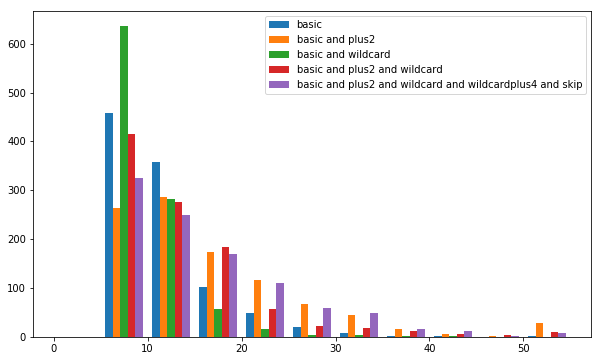

In [4]:
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

borders = list(range(0, 60, 5))

plt.hist(np.transpose(list(turns_per_scenario.values())),
         label=list(map(lambda x: f"{x}", turns_per_scenario.keys())),
         bins=borders
        )

plt.legend()
plt.show()

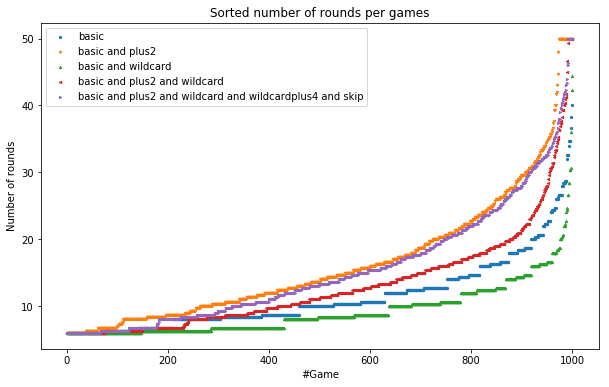

In [5]:

markers = ["o", "v", "^", "<", ">"]
for i, (scene, r) in enumerate(turns_per_scenario.items()):
    plt.scatter(x=range(1, len(r) + 1), y=sorted(r), label=scene, s=5, marker=markers[i])
plt.title("Sorted number of rounds per games")
plt.ylabel("Number of rounds")
plt.xlabel("#Game")
plt.legend()
plt.show()

# How many games take 15 - 30 rounds?

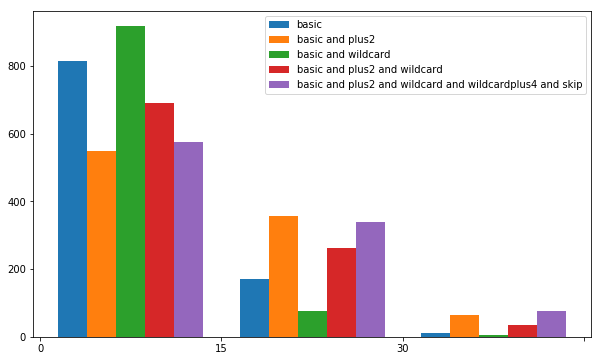

In [7]:
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)


modified_turns_per_scenario = {}
threshold = 30
for scenario, turns in turns_per_scenario.items():
    modified_turns_per_scenario[scenario] = list(map(lambda t: t if t < threshold else threshold + 1, turns))

borders = [0, 15, 30, 45]

plt.hist(np.transpose(list(turns_per_scenario.values())),
         label=list(map(lambda x: f"{x}", turns_per_scenario.keys())),
         bins=borders
        )
plt.xticks(borders, labels=[b if b <= threshold else "" for b in borders])

plt.legend()

plt.show()

In [8]:
for cards_per_player, r in turns_per_scenario.items():
    print("Cards per player:", cards_per_player)
    print("Maximum: ", max(r))
    print("Minimum:", min(r))
    print("Mean:", np.mean(r))
    print("\n")

Cards per player: basic
Maximum:  50.0
Minimum: 6.0
Mean: 11.412


Cards per player: basic and plus2
Maximum:  50.0
Minimum: 6.0
Mean: 16.451666666666668


Cards per player: basic and wildcard
Maximum:  44.333333333333336
Minimum: 6.0
Mean: 9.339666666666668


Cards per player: basic and plus2 and wildcard
Maximum:  50.0
Minimum: 6.0
Mean: 13.195


Cards per player: basic and plus2 and wildcard and wildcardplus4 and skip
Maximum:  50.0
Minimum: 6.0
Mean: 15.437


